DATA PREPROCESSING: Stock Price Download and Cleaning



c:\Users\natha\OneDrive - Johns Hopkins\bayesian_final_report\src\data_preprocessing.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_prices = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']


Downloaded: 1255 trading days × 7 stocks
Rows after alignment: 1255 (dropped 0 rows)

Computing log returns...
Log returns shape: (1254, 7)
Date range: 2020-11-25 to 2025-11-21

Saving processed data to ../data/processed/...
Saved: ..\data\processed\log_returns.csv
Saved: ..\data\processed\aligned_prices.csv
PREPROCESSING COMPLETE
       AAPL_return  AMZN_return  GOOGL_return  META_return  MSFT_return  \
count  1254.000000  1254.000000   1254.000000  1254.000000  1254.000000   
mean      0.000705     0.000277      0.000981     0.000614     0.000664   
std       0.017639     0.022123      0.019500     0.027614     0.016162   
min      -0.097013    -0.151398     -0.099924    -0.306391    -0.080295   
25%      -0.008046    -0.011180     -0.009507    -0.011617    -0.007439   
50%       0.001118     0.000331      0.001536     0.000612     0.000662   
75%       0.010054     0.012383      0.011394     0.013776     0.009868   
max       0.142617     0.126949      0.097348     0.209307     0.09

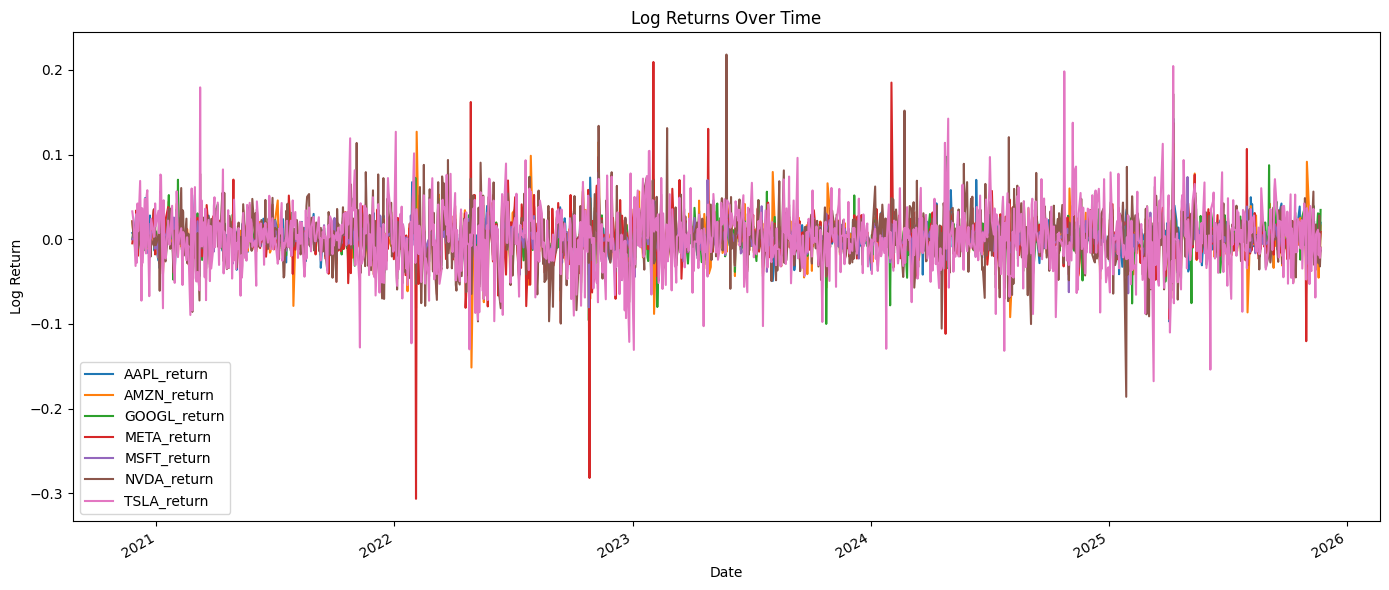

In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, str(Path.cwd().parent))
from src.data_preprocessing import download_and_process_stocks

# Cell 2: Configuration
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'TSLA']
START_DATE = '2020-11-24'
END_DATE = '2025-11-24'
OUTPUT_DIR = '../data/processed'

# Cell 3: Download and Process Data
log_returns = download_and_process_stocks(
    tickers=TICKERS,
    start_date=START_DATE,
    end_date=END_DATE,
    output_dir=OUTPUT_DIR
)

# Cell 4: Basic Statistics
print(log_returns.describe())

# Cell 5: Visualization
log_returns.plot(figsize=(14, 6))
plt.title("Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.tight_layout()
plt.savefig('../figures/log_returns.png', dpi=300)
plt.show()

In [4]:
date_of_drop = log_returns['META_return'].idxmin()
print(f"The date of the largest Meta drop was: {date_of_drop}")

The date of the largest Meta drop was: 2022-02-03 00:00:00
